In [183]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
%matplotlib inline

In [184]:
sns.set_style(style='whitegrid')
plt.tight_layout()

O dataset é carregado em um Data Frame.

In [223]:
data, meta = arff.loadarff('Genes_Atividade_IA.arff')

In [188]:
genes = pd.DataFrame(data)

In [189]:
genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 33 columns):
adipose_tissue     2000 non-null float64
adrenal_gland      2000 non-null float64
animal_ovary       2000 non-null float64
appendix           2000 non-null float64
bladder            2000 non-null float64
bone_marrow        2000 non-null float64
cerebral_cortex    2000 non-null float64
colon              2000 non-null float64
duodenum           2000 non-null float64
endometrium        2000 non-null float64
esophagus          2000 non-null float64
fallopian_tube     2000 non-null float64
gallbladder        2000 non-null float64
heart              2000 non-null float64
kidney             2000 non-null float64
liver              2000 non-null float64
lung               2000 non-null float64
lymph_node         2000 non-null float64
pancreas           2000 non-null float64
placenta           2000 non-null float64
prostate           2000 non-null float64
rectum             2000 non-null

In [190]:
genes.head(5)

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,...,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil,class
0,31.730678,27.947800,109.900798,10.676703,88.592974,0.628672,15.263091,70.636083,30.415583,59.427387,...,1.281708,9.914097,23.935905,21.242137,18.392589,23.496108,66.480961,59.541743,15.873599,b'ENSG00000000003'
1,22.211475,0.621062,7.850057,2.491231,0.708744,0.000003,0.000004,1.535567,0.276505,0.848963,...,0.000002,0.330470,0.299199,1.699371,0.735704,0.000003,0.349900,0.458013,0.317472,b'ENSG00000000005'
2,79.326695,124.212446,102.050741,103.208129,116.942725,88.014135,61.052363,85.991753,66.361272,131.589213,...,27.770329,72.703379,80.783681,101.962255,99.319983,67.551311,129.462925,160.304693,117.464636,b'ENSG00000000419'
3,6.346136,9.315933,15.700114,14.235604,14.174876,3.143362,7.631545,12.284536,8.295159,16.979253,...,2.136179,13.218796,8.975965,12.745282,14.714072,11.748054,13.995992,18.320536,12.698880,b'ENSG00000000457'
4,2.221147,2.794780,3.925029,7.117802,3.543719,6.286724,2.289464,3.071134,2.765053,8.489627,...,0.213618,3.304699,2.991988,4.248427,3.678518,2.349611,17.494990,3.664107,9.524160,b'ENSG00000000460'


In [191]:
genes.as_matrix()

array([[31.73067795, 27.94780042, 109.9007984, ..., 59.54174302,
        15.87359946, b'ENSG00000000003'],
       [22.21147457, 0.621062231, 7.850057026, ..., 0.458013408,
        0.317471989, b'ENSG00000000005'],
       [79.32669489, 124.2124463, 102.0507413, ..., 160.3046927,
        117.464636, b'ENSG00000000419'],
       ..., 
       [60.28828811, 31.05311157, 27.47519959, ..., 54.96160894,
        44.44607848, b'ENSG00000093144'],
       [12.69227118, 18.63186694, 23.55017108, ..., 27.48080447,
        15.87359946, b'ENSG00000093167'],
       [22.21147457, 24.84248926, 39.25028513, ..., 41.2212067,
        19.04831935, b'ENSG00000093183']], dtype=object)

In [192]:
genes.columns

Index(['adipose_tissue', 'adrenal_gland', 'animal_ovary', 'appendix',
       'bladder', 'bone_marrow', 'cerebral_cortex', 'colon', 'duodenum',
       'endometrium', 'esophagus', 'fallopian_tube', 'gallbladder', 'heart',
       'kidney', 'liver', 'lung', 'lymph_node', 'pancreas', 'placenta',
       'prostate', 'rectum', 'salivary_gland', 'skeletal_muscle', 'skin',
       'small_intestine', 'smooth_muscle', 'spleen', 'stomach', 'testis',
       'thyroid', 'tonsil', 'class'],
      dtype='object')

**IMPORTANTE:** A coluna 'class' foi removida, pois não tem utilidade dentro do problema.

In [193]:
matriz_genes = genes.as_matrix(columns=['adipose_tissue', 'adrenal_gland', 'animal_ovary', 'appendix',
       'bladder', 'bone_marrow', 'cerebral_cortex', 'colon', 'duodenum',
       'endometrium', 'esophagus', 'fallopian_tube', 'gallbladder', 'heart',
       'kidney', 'liver', 'lung', 'lymph_node', 'pancreas', 'placenta',
       'prostate', 'rectum', 'salivary_gland', 'skeletal_muscle', 'skin',
       'small_intestine', 'smooth_muscle', 'spleen', 'stomach', 'testis',
       'thyroid', 'tonsil'])

In [194]:
from sklearn.cluster import KMeans

In [268]:
k2 = KMeans(n_clusters=2,init='random')

In [269]:
k2.fit(matriz_genes)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [270]:
k2.cluster_centers_

array([[   33.05769879,    38.46036179,    45.64199649,    41.6725344 ,
           40.83242625,    41.69772984,    42.19425159,    35.63578756,
           32.72668488,    46.491675  ,    37.78442227,    49.13899883,
           45.78074812,    20.89814508,    24.12778179,    32.0160092 ,
           43.45144617,    42.33279564,    10.00268373,    44.24513378,
           43.15074427,    37.17556135,    19.31770282,    21.77916699,
           33.50381168,    36.37780249,    44.48165232,    41.8597988 ,
           29.67164711,    42.6702187 ,    52.24501301,    37.02762011],
       [ 1742.33152636,   903.02448504,  1673.18358373,  3151.00009738,
         2355.20623764,  3514.36847572,  1071.74152332,  1472.03841333,
         2005.84846156,  1639.16498643,  1097.62783825,  1349.98902808,
         3258.05534997,   311.56863999,  1052.93635567,  1110.33644804,
         3304.33791194,  3459.85310332,  7177.08230141,  2290.07687609,
          968.53938613,  1523.28030312,  2393.90622469,   100.1

In [271]:
k2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [272]:
pca = sklearnPCA(n_components=2)
pca_genes = pd.DataFrame(pca.fit_transform(matriz_genes))

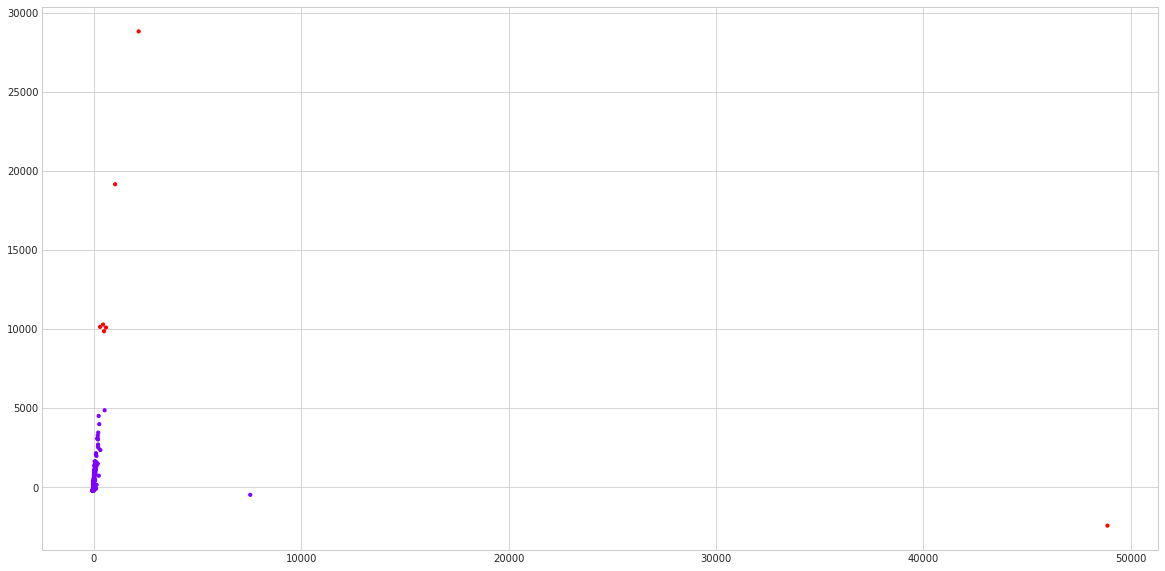

In [291]:
plt.figure(figsize=(20,10))
plt.scatter(pca_genes[0],pca_genes[1],c=k2.labels_,cmap='rainbow',s=10)

In [274]:
k10 = KMeans(n_clusters=10,init='random')

In [275]:
k10.fit(matriz_genes)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

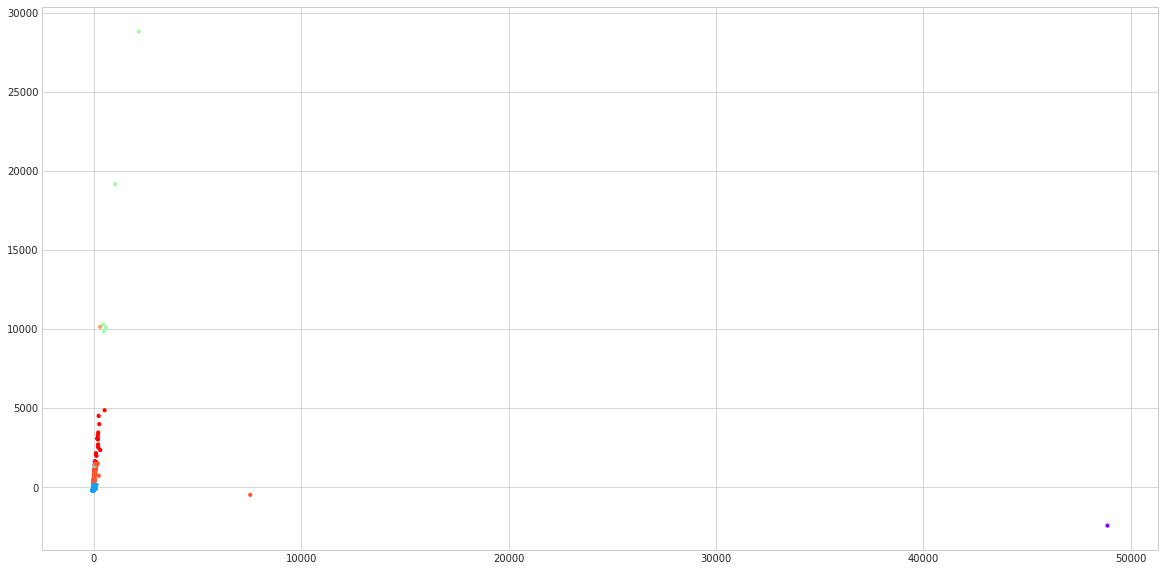

In [276]:
plt.figure(figsize=(20,10))
plt.scatter(pca_genes[0],pca_genes[1],c=k10.labels_,cmap='rainbow',s=10)

(-500, 12000)

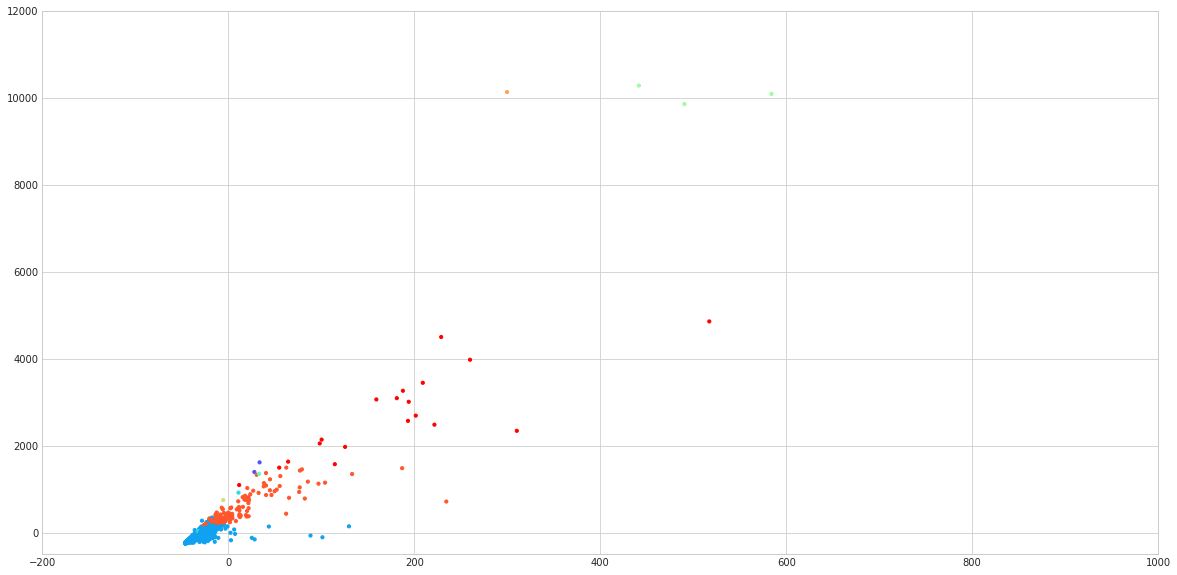

In [277]:
plt.figure(figsize=(20,10))
plt.scatter(pca_genes[0],pca_genes[1],c=k10.labels_,cmap='rainbow',s=10)
plt.xlim(-200,1000)
plt.ylim(-500,12000)

In [278]:
k100 = KMeans(n_clusters=100,init='random')

In [279]:
k100.fit(matriz_genes)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

(-500, 12000)

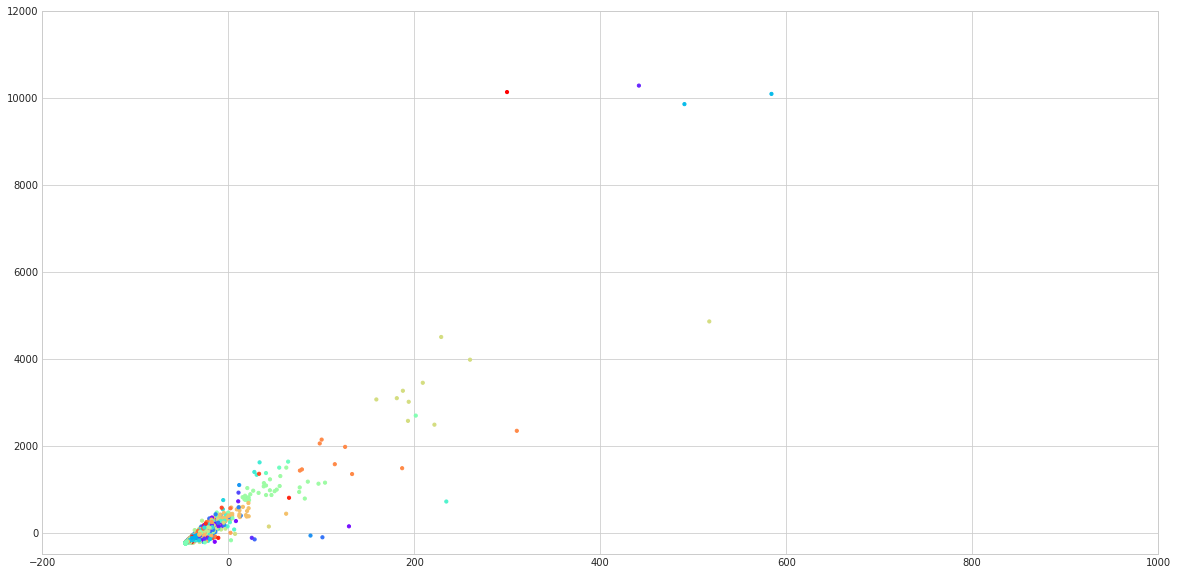

In [280]:
plt.figure(figsize=(20,10))
plt.scatter(pca_genes[0],pca_genes[1],c=k100.labels_,cmap='rainbow',s=10)
plt.xlim(-200,1000)
plt.ylim(-500,12000)

(-500, 2000)

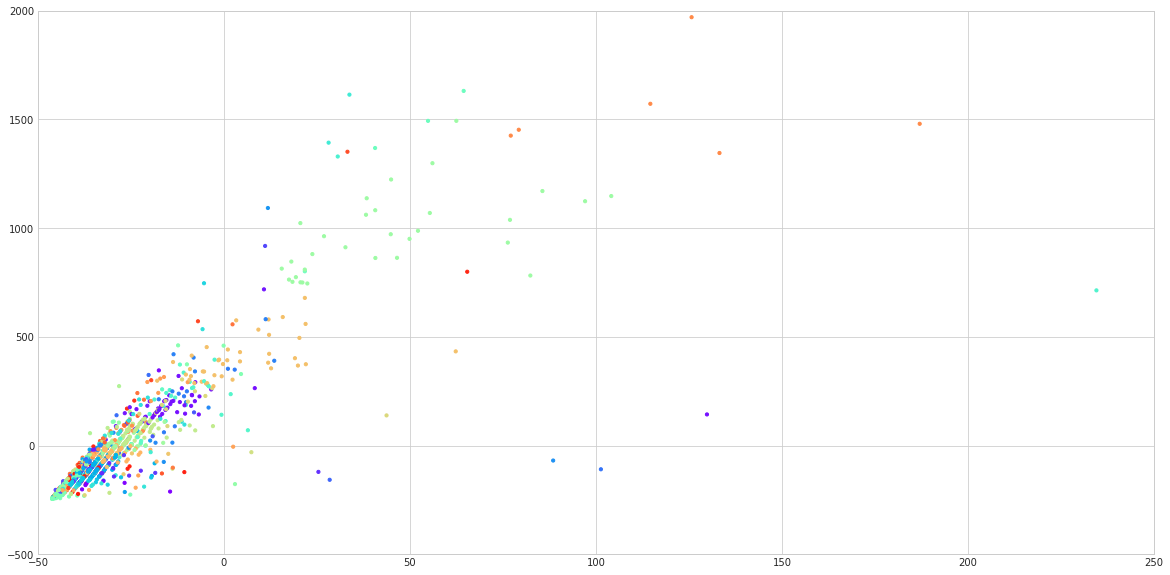

In [281]:
plt.figure(figsize=(20,10))
plt.scatter(pca_genes[0], pca_genes[1],c=k100.labels_,cmap='rainbow',s=10)
plt.xlim(-50,250)
plt.ylim(-500,2000)

In [210]:
from sklearn.cluster import AgglomerativeClustering as HCluster

In [212]:
hk2 = HCluster(n_clusters=2)

In [213]:
hk2.fit(matriz_genes)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x7f1f94246730>)

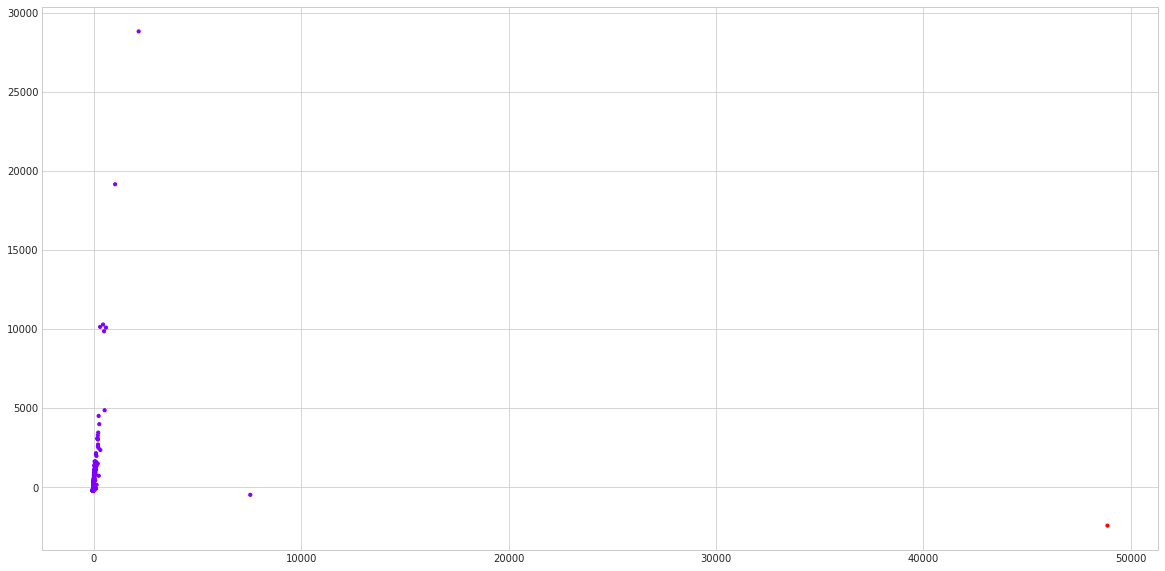

In [216]:
plt.figure(figsize=(20,10))
plt.scatter(pca_genes[0],pca_genes[1],c=hk2.labels_,cmap='rainbow',s=10)

In [220]:
hk10 = HCluster(n_clusters=10)

In [221]:
hk10.fit(matriz_genes)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func=<function mean at 0x7f1f94246730>)

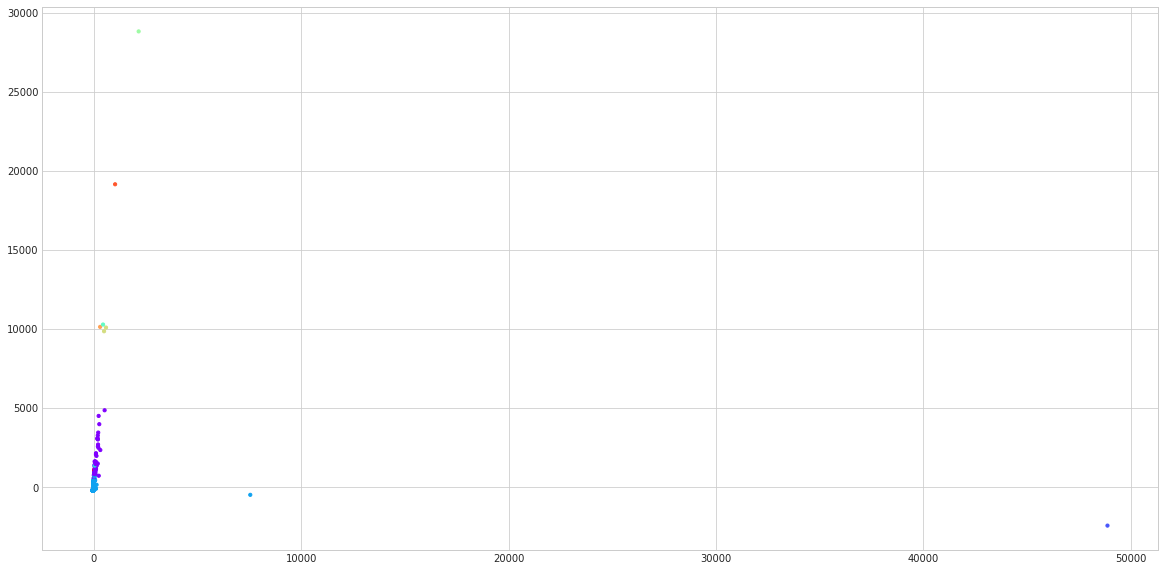

In [225]:
plt.figure(figsize=(20,10))
plt.scatter(pca_genes[0],pca_genes[1],c=hk10.labels_,cmap='rainbow',s=10)

(-500, 12000)

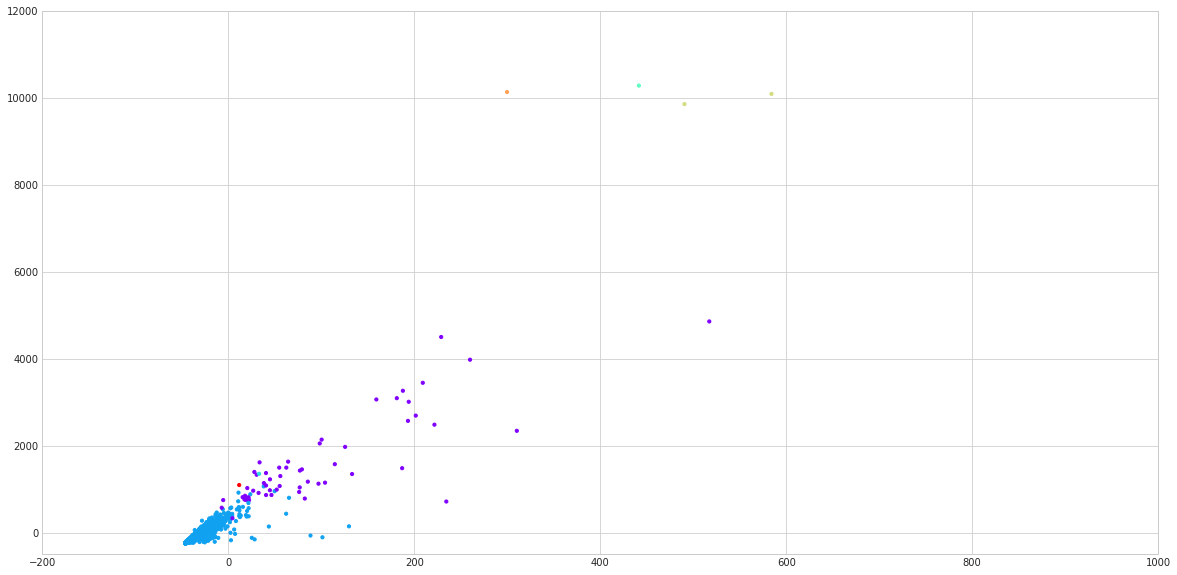

In [227]:
plt.figure(figsize=(20,10))
plt.scatter(pca_genes[0],pca_genes[1],c=hk10.labels_,cmap='rainbow',s=10)
plt.xlim(-200,1000)
plt.ylim(-500,12000)

In [228]:
hk100 = HCluster(n_clusters=100)

In [229]:
hk100.fit(matriz_genes)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=100,
            pooling_func=<function mean at 0x7f1f94246730>)

(-500, 12000)

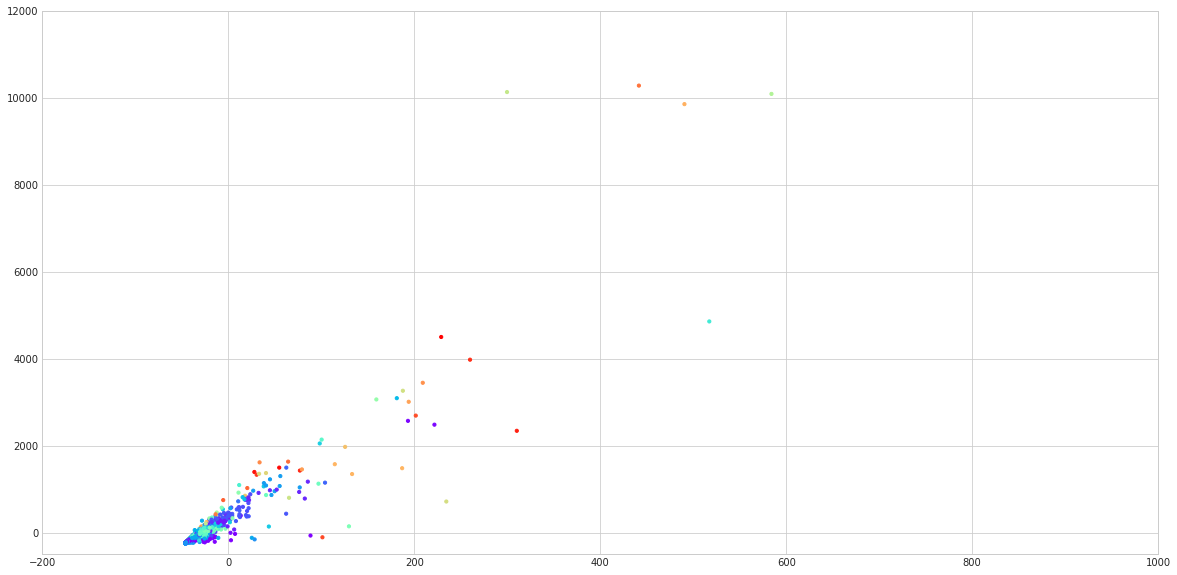

In [230]:
plt.figure(figsize=(20,10))
plt.scatter(pca_genes[0],pca_genes[1],c=hk100.labels_,cmap='rainbow',s=10)
plt.xlim(-200,1000)
plt.ylim(-500,12000)

(-500, 2000)

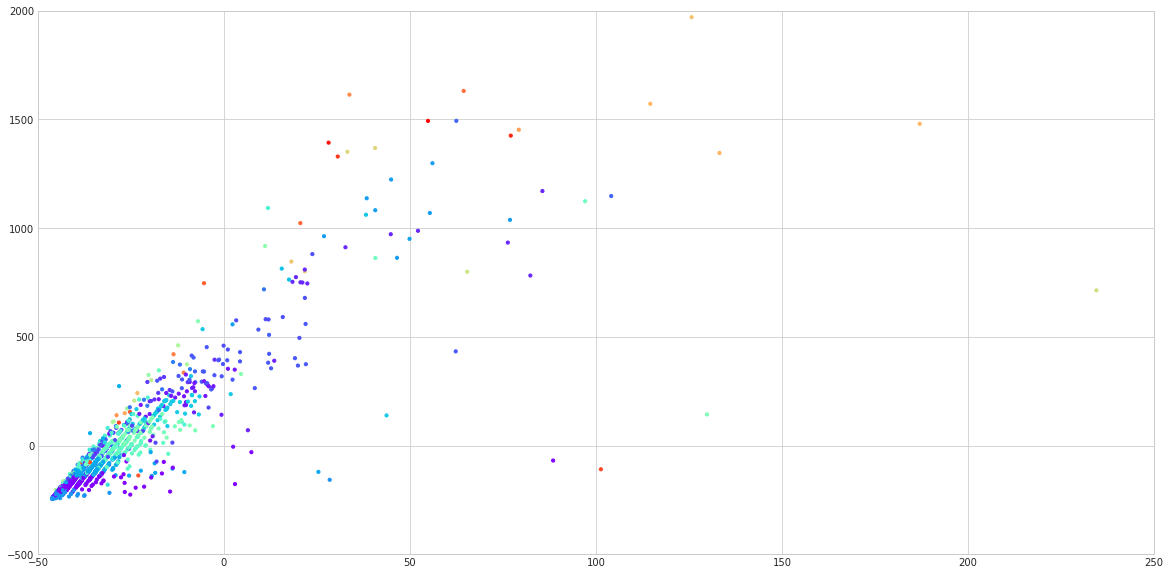

In [233]:
plt.figure(figsize=(20,10))
plt.scatter(pca_genes[0],pca_genes[1],c=hk100.labels_,cmap='rainbow',s=10)
plt.xlim(-50,250)
plt.ylim(-500,2000)

In [285]:
crange = range(1,101)
cerror = []

for cluster in crange:
    clusters = KMeans(cluster,init='random')
    clusters.fit(matriz_genes)
    cerror.append(clusters.inertia_)

In [286]:
clusters_df = pd.DataFrame({"num_clusters":crange,"cluster_errors":cerror})

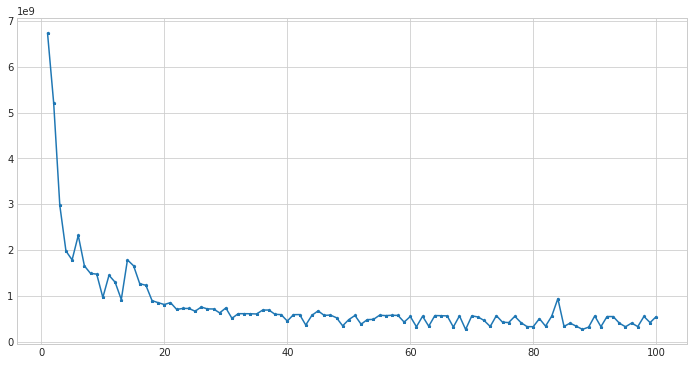

In [287]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker="*",ms=3)